In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
# Import a single input CSV file from train folder
input_df = pd.read_csv('train/input_2023_w01.csv')
input_df.head()


,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [3]:
game_df = input_df[input_df['game_id'] == 2023090700]

In [4]:
game_df = game_df.sort_values(by='play_id', inplace=True)

/var/folders/fm/7zh52wdj2mx7v17vqtcy7ggc0000gn/T/ipykernel_64160/4240106802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df = game_df.sort_values(by='play_id', inplace=True)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

class FootballField:
    """
    A class to visualize an NFL football field with proper dimensions.
    Field dimensions: x (0-120 yards), y (0-53.3 yards)
    Endzones: x (0-10) and x (110-120)
    Playing field: x (10-110)
    """
    
    def __init__(self, figsize=(12, 6.4)):
        """
        Initialize the football field visualization.
        
        Parameters:
        -----------
        figsize : tuple
            Size of the figure (width, height)
        """
        self.fig, self.ax = plt.subplots(figsize=figsize)
        self.field_length = 120  # Total length including endzones
        self.field_width = 53.3  # Width of field in yards
        self.endzone_length = 10  # Length of each endzone
        
    def draw_field(self):
        """Draw the football field with all markings."""
        # Set field boundaries with padding to ensure boundary markers are visible
        padding = 3  # yards of padding on each side
        self.ax.set_xlim(-padding, self.field_length + padding)
        self.ax.set_ylim(-padding, self.field_width + padding)
        
        # Draw field background (green)
        field_rect = Rectangle((0, 0), self.field_length, self.field_width, 
                               facecolor='#2d5016', edgecolor='white', linewidth=2)
        self.ax.add_patch(field_rect)
        
        # Draw endzones (darker green)
        left_endzone = Rectangle((0, 0), self.endzone_length, self.field_width,
                                 facecolor='#1a3d0d', alpha=0.5, edgecolor='white', linewidth=2)
        right_endzone = Rectangle((110, 0), self.endzone_length, self.field_width,
                                  facecolor='#1a3d0d', alpha=0.5, edgecolor='white', linewidth=2)
        self.ax.add_patch(left_endzone)
        self.ax.add_patch(right_endzone)
        
        # Draw yard lines
        for yard in range(10, 120, 5):
            line_width = 2 if yard % 10 == 0 else 1
            alpha = 1.0 if yard % 10 == 0 else 0.5
            self.ax.axvline(x=yard, color='white', linewidth=line_width, alpha=alpha)
        
        # Add yard markers (every 10 yards)
        for yard in range(20, 110, 10):
            # Calculate the yard number to display (counts up to 50 then down)
            if yard <= 60:
                yard_num = yard - 10
            else:
                yard_num = 110 - yard
            
            # Add yard numbers on both sides of the field
            self.ax.text(yard, 5, str(yard_num), fontsize=12, color='white', 
                        ha='center', va='center', weight='bold', rotation=0)
            self.ax.text(yard, self.field_width - 5, str(yard_num), fontsize=12, 
                        color='white', ha='center', va='center', weight='bold', rotation=180)
        
        # Add endzone text
        self.ax.text(5, self.field_width / 2, 'ENDZONE', fontsize=14, color='white',
                    ha='center', va='center', weight='bold', rotation=90, alpha=0.7)
        self.ax.text(115, self.field_width / 2, 'ENDZONE', fontsize=14, color='white',
                    ha='center', va='center', weight='bold', rotation=90, alpha=0.7)
        
        # Labels
        self.ax.set_xlabel('Field Position (yards)', fontsize=12, color='black')
        self.ax.set_ylabel('Field Width (yards)', fontsize=12, color='black')
        self.ax.set_title('NFL Football Field', fontsize=14, weight='bold', pad=20)
        
        # Set aspect ratio to match field dimensions
        self.ax.set_aspect('equal')
        
        return self.fig, self.ax
    
    def plot_routes(self, players, colors=None, linewidth=2.5, marker_size=8, show_labels=False, show_start_end=False, color_by_side=True, show_ball_landing=True):
        """
        Plot player routes on the field.
        
        Parameters:
        -----------
        players : Player or list of Player objects
            Single Player object or list of Player objects to plot
        colors : str, list, or None
            Color(s) for the routes. If None, uses offense/defense colors or default cycle
        linewidth : float
            Width of the route lines
        marker_size : float
            Size of start/end position markers
        show_labels : bool
            Whether to show player names as labels
        show_start_end : bool
            Whether to mark start (circle) and end (triangle) positions
        color_by_side : bool
            Whether to color routes by offense (red) vs defense (blue)
        show_ball_landing : bool
            Whether to show where the ball landed with a star marker
        """
        # Ensure players is a list
        if not isinstance(players, list):
            players = [players]
        
        # Set up colors
        if colors is None:
            if color_by_side:
                # Use team-specific colors: blue for offense, red for defense
                offense_color = '#3498DB'  # Blue
                defense_color = '#E74C3C'  # Red
            else:
                # Default color cycle
                default_colors = ['#FF6B6B', '#4ECDC4', '#FFE66D', '#95E1D3', 
                                '#F38181', '#AA96DA', '#FCBAD3', '#A8D8EA']
                colors = default_colors
        elif isinstance(colors, str):
            colors = [colors] * len(players)
            color_by_side = False
        
        # Plot each player's route
        for i, player in enumerate(players):
            # Determine color based on player side if color_by_side is enabled
            if color_by_side and colors is None:
                if hasattr(player, 'player_side') and player.player_side == 'Offense':
                    color = offense_color
                elif hasattr(player, 'player_side') and player.player_side == 'Defense':
                    color = defense_color
                else:
                    color = '#95A5A6'  # Gray for unknown
            else:
                color = colors[i % len(colors)]
            
            # Get route coordinates
            x_route, y_route = player.get_route()
            
            # Check if player has both input and output phases
            if hasattr(player, 'num_output_frames') and player.num_output_frames > 0:
                # Split route into input and output phases
                input_end_idx = player.num_input_frames
                
                # Plot input phase (pre-throw) with team color
                self.ax.plot(x_route[:input_end_idx], y_route[:input_end_idx], 
                           color=color, linewidth=linewidth, alpha=0.8, zorder=10)
                
                # Plot output phase (post-throw) in yellow
                self.ax.plot(x_route[input_end_idx-1:], y_route[input_end_idx-1:], 
                           color='#F1C40F', linewidth=linewidth, alpha=0.8, zorder=10)
            else:
                # Plot entire route with team color (no output data)
                self.ax.plot(x_route, y_route, color=color, linewidth=linewidth, 
                            alpha=0.8, label=player.player_name, zorder=10)
            
            # Always show a subtle starting position marker
            self.ax.scatter(x_route[0], y_route[0], color=color, s=marker_size*5, 
                          marker='o', edgecolors='white', linewidth=1, zorder=11, alpha=0.9)
            
            # Mark start and end positions (if enabled, these will be more prominent)
            if show_start_end:
                # Start position (larger circle)
                self.ax.scatter(x_route[0], y_route[0], color=color, s=marker_size*10, 
                              marker='o', edgecolors='white', linewidth=1.5, zorder=11)
                
                # End position (triangle)
                self.ax.scatter(x_route[-1], y_route[-1], color=color, s=marker_size*15, 
                              marker='^', edgecolors='white', linewidth=1.5, zorder=11)
            
            # Add player name label at end position
            if show_labels:
                self.ax.annotate(player.player_name, 
                               xy=(x_route[-1], y_route[-1]),
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=9, color=color, weight='bold',
                               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                                       edgecolor=color, alpha=0.8),
                               zorder=12)
        
        # Plot ball landing location
        if show_ball_landing and len(players) > 0:
            # Get ball landing coordinates from first player (same for all players in play)
            first_player = players[0]
            if hasattr(first_player, 'ball_land_x') and first_player.ball_land_x is not None:
                ball_x = first_player.ball_land_x
                ball_y = first_player.ball_land_y
                
                # Plot star marker for ball landing spot
                self.ax.scatter(ball_x, ball_y, color='gold', s=marker_size*30, 
                              marker='*', edgecolors='black', linewidth=2, 
                              zorder=15, label='Ball Landing')
        
        # Add legend if multiple players and color_by_side is enabled
        if color_by_side and colors is None:
            # Create custom legend for offense/defense
            from matplotlib.lines import Line2D
            legend_elements = [
                Line2D([0], [0], color=offense_color, lw=linewidth, label='Offense (Input)'),
                Line2D([0], [0], color=defense_color, lw=linewidth, label='Defense (Input)')
            ]
            # Check if any player has output data
            has_output = any(hasattr(p, 'num_output_frames') and p.num_output_frames > 0 for p in players)
            if has_output:
                legend_elements.append(
                    Line2D([0], [0], color='#F1C40F', lw=linewidth, label='Post-Throw (Output)')
                )
            if show_ball_landing:
                legend_elements.append(
                    Line2D([0], [0], marker='*', color='w', markerfacecolor='gold', 
                           markersize=15, markeredgecolor='black', markeredgewidth=1.5,
                           label='Ball Landing', linestyle='None')
                )
            self.ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9, fontsize=11)
        elif len(players) > 1 and not color_by_side:
            self.ax.legend(loc='upper right', framealpha=0.9, fontsize=9)
    
    def show(self):
        """Display the field."""
        plt.tight_layout()
        plt.show()


In [6]:
class Player:
    """
    A class to represent a player and process their positional data into a route.
    Can handle both input (pre-throw) and output (post-throw) data.
    """
    
    def __init__(self, input_data, output_data=None):
        """
        Initialize a Player with their tracking data.
        
        Parameters:
        -----------
        input_data : DataFrame
            DataFrame containing the player's tracking data (pre-throw phase)
            Must include columns: 'frame_id', 'x', 'y', and ideally 'nfl_id', 'player_name'
        output_data : DataFrame, optional
            DataFrame containing the player's tracking data (post-throw phase)
            Must include columns: 'frame_id', 'x', 'y'
        """
        # Sort input data by frame_id
        input_sorted = input_data.sort_values('frame_id').reset_index(drop=True).copy()
        
        # Add phase indicator for input data
        input_sorted['phase'] = 'input'
        
        # If output data is provided, merge it
        if output_data is not None and len(output_data) > 0:
            output_sorted = output_data.sort_values('frame_id').reset_index(drop=True).copy()
            
            # Add phase indicator for output data
            output_sorted['phase'] = 'output'
            
            # Adjust frame_ids in output data to continue from input
            max_input_frame = input_sorted['frame_id'].max()
            output_sorted['frame_id'] = output_sorted['frame_id'] + max_input_frame
            
            # Concatenate input and output data
            self.data = pd.concat([input_sorted, output_sorted], ignore_index=True)
        else:
            self.data = input_sorted
        
        # Extract route coordinates
        self.x_coords = self.data['x'].values
        self.y_coords = self.data['y'].values
        
        # Extract player metadata (from input data)
        self.nfl_id = input_sorted['nfl_id'].iloc[0] if 'nfl_id' in input_sorted.columns else None
        self.player_name = input_sorted['player_name'].iloc[0] if 'player_name' in input_sorted.columns else 'Unknown'
        self.player_role = input_sorted['player_role'].iloc[0] if 'player_role' in input_sorted.columns else None
        self.team = input_sorted['team'].iloc[0] if 'team' in input_sorted.columns else None
        self.player_side = input_sorted['player_side'].iloc[0] if 'player_side' in input_sorted.columns else None
        
        # Ball landing location (same for all players in the play)
        self.ball_land_x = input_sorted['ball_land_x'].iloc[0] if 'ball_land_x' in input_sorted.columns else None
        self.ball_land_y = input_sorted['ball_land_y'].iloc[0] if 'ball_land_y' in input_sorted.columns else None
        
        # Route metadata
        self.num_frames = len(self.data)
        self.num_input_frames = len(input_sorted)
        self.num_output_frames = len(output_data) if output_data is not None and len(output_data) > 0 else 0
        self.start_position = (self.x_coords[0], self.y_coords[0])
        self.end_position = (self.x_coords[-1], self.y_coords[-1])
        
    def get_route(self):
        """
        Get the route as x and y coordinate arrays.
        
        Returns:
        --------
        tuple : (x_coords, y_coords)
            Arrays of x and y coordinates representing the player's route
        """
        return self.x_coords, self.y_coords
    
    def get_position_at_frame(self, frame_idx):
        """
        Get the player's position at a specific frame index.
        
        Parameters:
        -----------
        frame_idx : int
            Frame index (0-based)
            
        Returns:
        --------
        tuple : (x, y)
            Position at the specified frame
        """
        if 0 <= frame_idx < self.num_frames:
            return (self.x_coords[frame_idx], self.y_coords[frame_idx])
        else:
            raise IndexError(f"Frame index {frame_idx} out of range (0-{self.num_frames-1})")
    
    def __repr__(self):
        """String representation of the Player."""
        return f"Player(name='{self.player_name}', id={self.nfl_id}, role={self.player_role}, frames={self.num_frames})"


In [7]:
# Load output data (post-throw tracking)
output_df = pd.read_csv('train/output_2023_w01.csv')
print(f"Loaded output data: {len(output_df)} rows")
print(f"Output columns: {output_df.columns.tolist()}")


Loaded output data: 32088 rows
Output columns: ['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y']


In [8]:
# Visualize complete routes (input + output) for play 219
play_id = 219
game_id = 2023090700

# Filter input data for this play
input_play_df = game_df[game_df['play_id'] == play_id].sort_values(by='frame_id')

# Filter output data for this play
output_play_df = output_df[(output_df['game_id'] == game_id) & (output_df['play_id'] == play_id)]

# Create Player objects with complete routes (input + output)
unique_players = input_play_df['nfl_id'].unique()
complete_players = []

for player_id in unique_players:
    # Get input and output data for this player
    player_input = input_play_df[input_play_df['nfl_id'] == player_id]
    player_output = output_play_df[output_play_df['nfl_id'] == player_id]
    
    # Create Player object with both datasets
    player = Player(player_input, player_output)
    complete_players.append(player)
    
print(f"Created {len(complete_players)} players with complete routes")
print(f"Input frames: {complete_players[2].num_input_frames}")
print(f"Output frames: {complete_players[2].num_output_frames}") # testing random player for output frames
print(f"Total frames: {complete_players[2].num_frames}")

# Visualize complete routes
field = FootballField(figsize=(18, 10))
field.draw_field()
field.ax.set_title(f'Play {play_id} - Complete Player Routes (Input + Output)', 
                   fontsize=16, weight='bold', pad=20)
field.plot_routes(complete_players, color_by_side=True, show_ball_landing=True)
field.show()


TypeError: 'NoneType' object is not subscriptable

Visualizing 10 plays with complete routes...


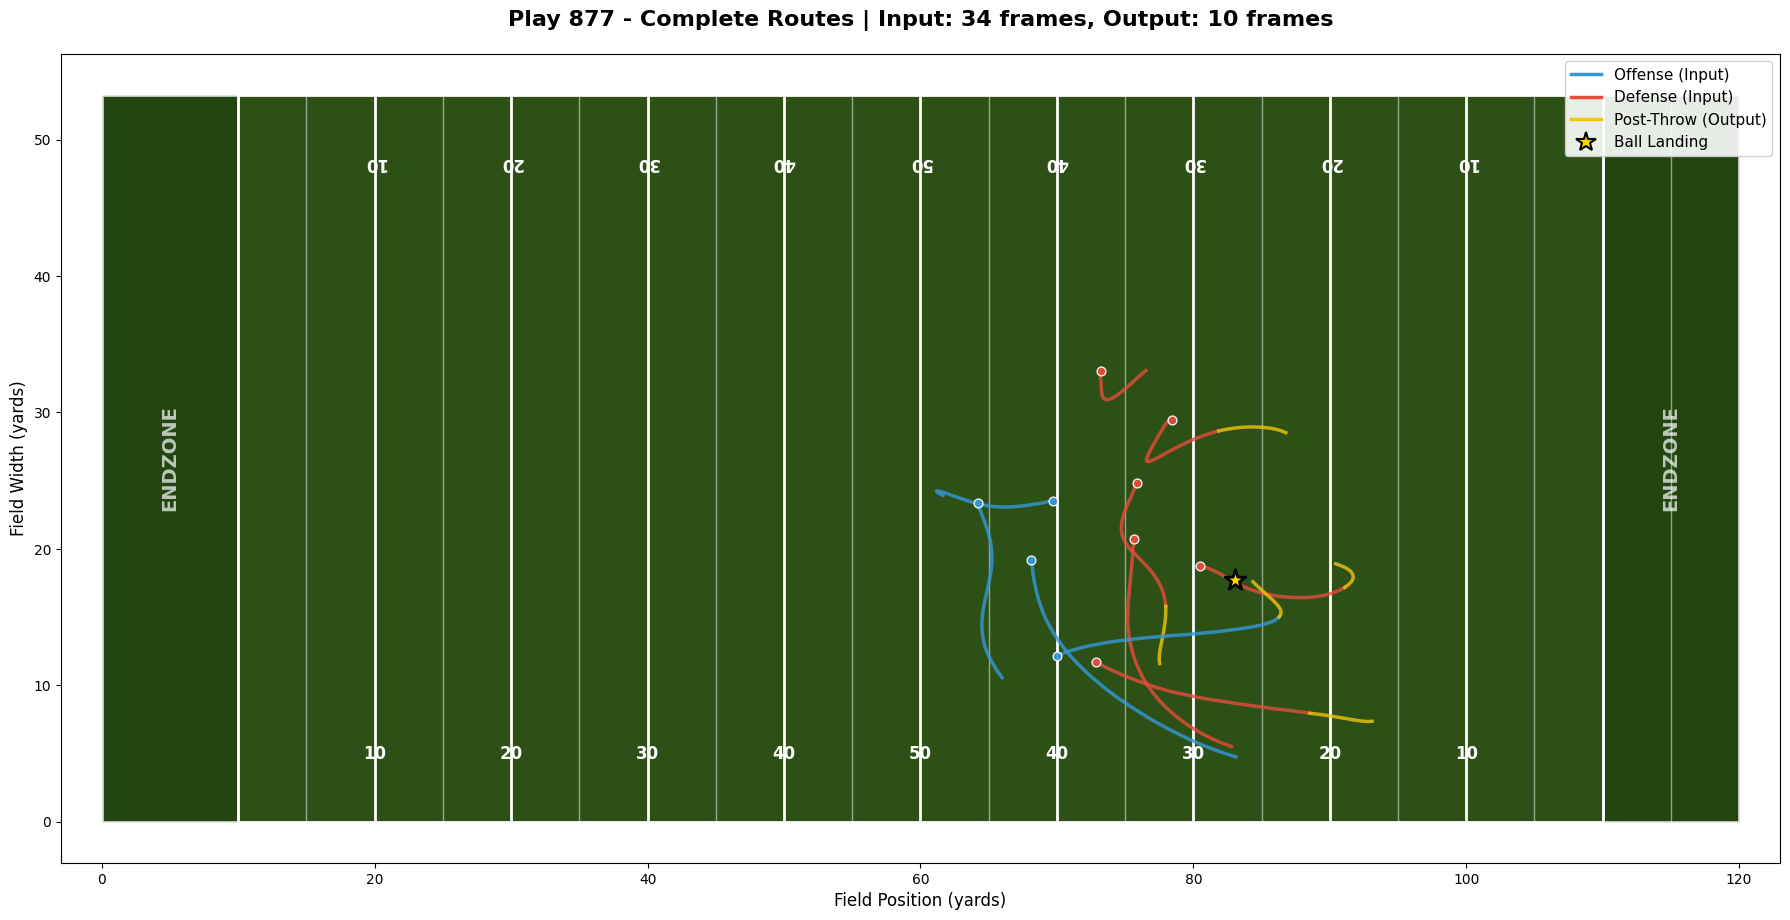

Play 877: 10 players, 44 total frames


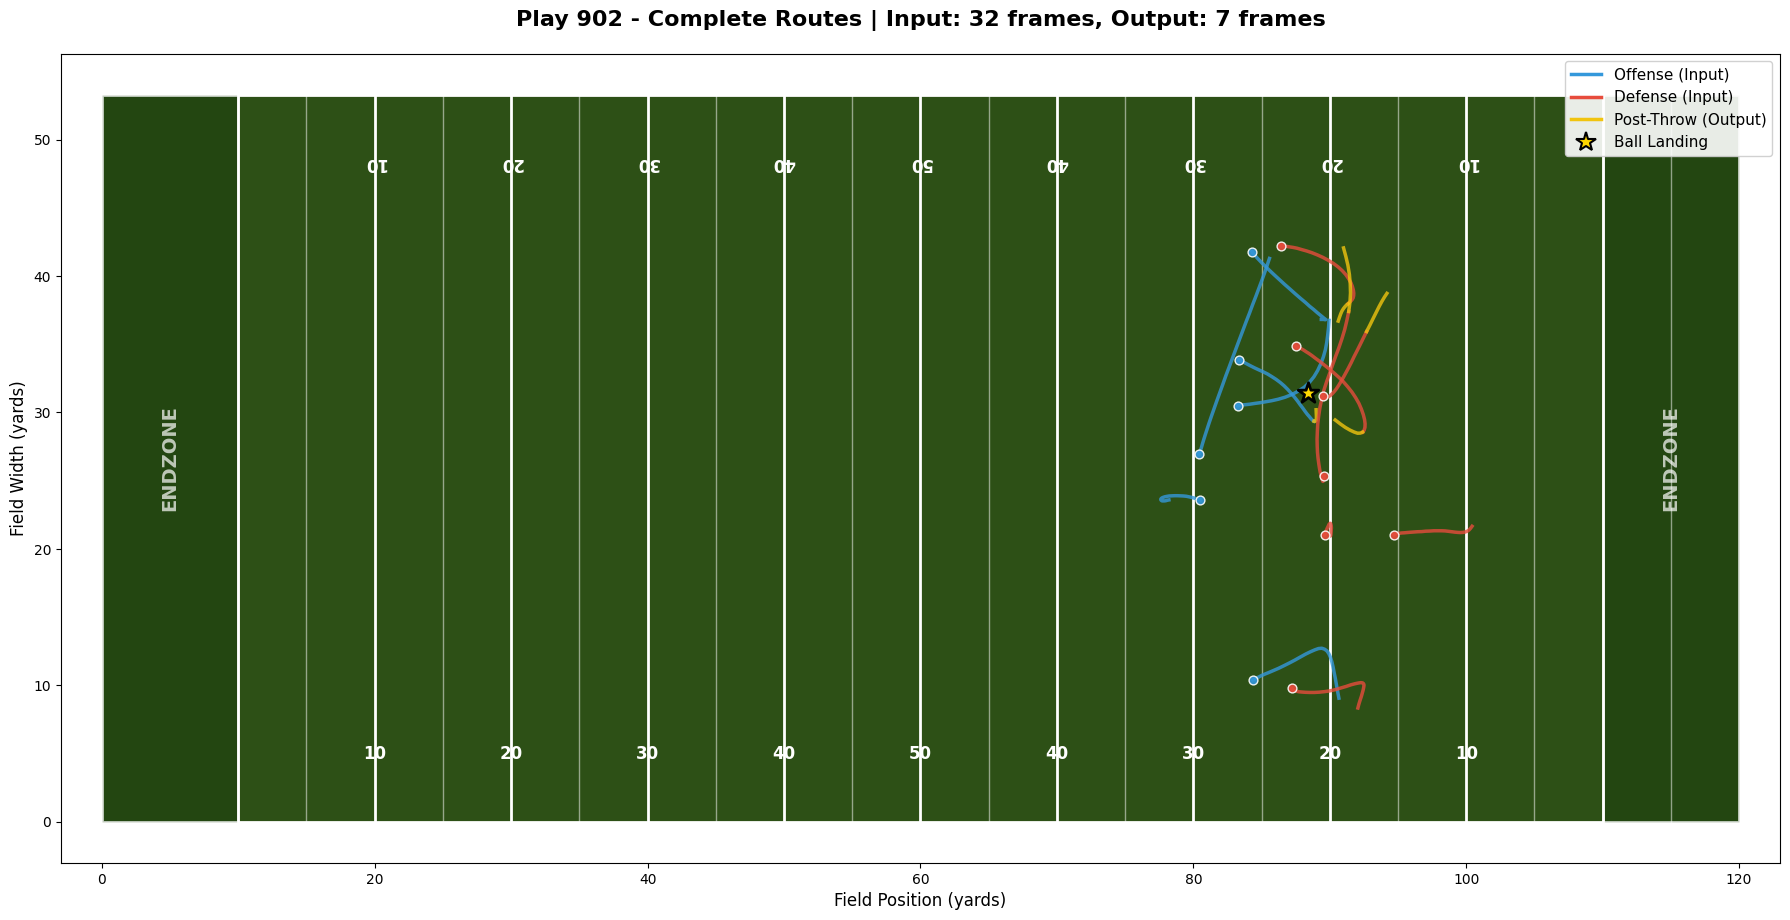

Play 902: 13 players, 39 total frames


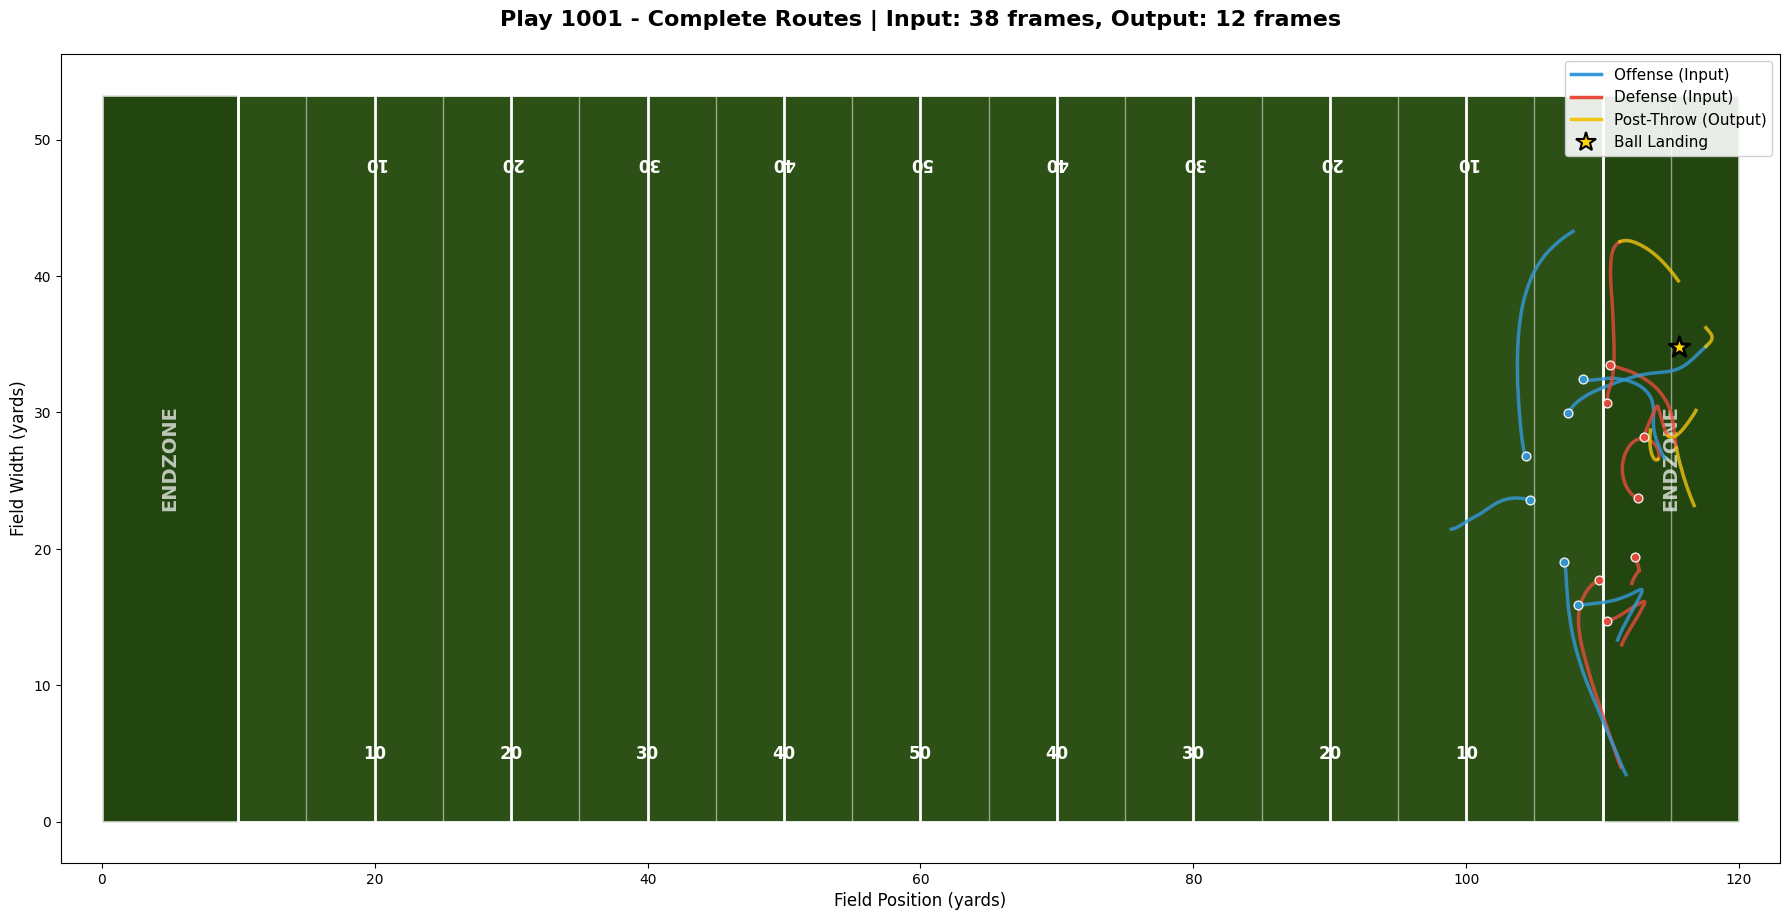

Play 1001: 13 players, 50 total frames


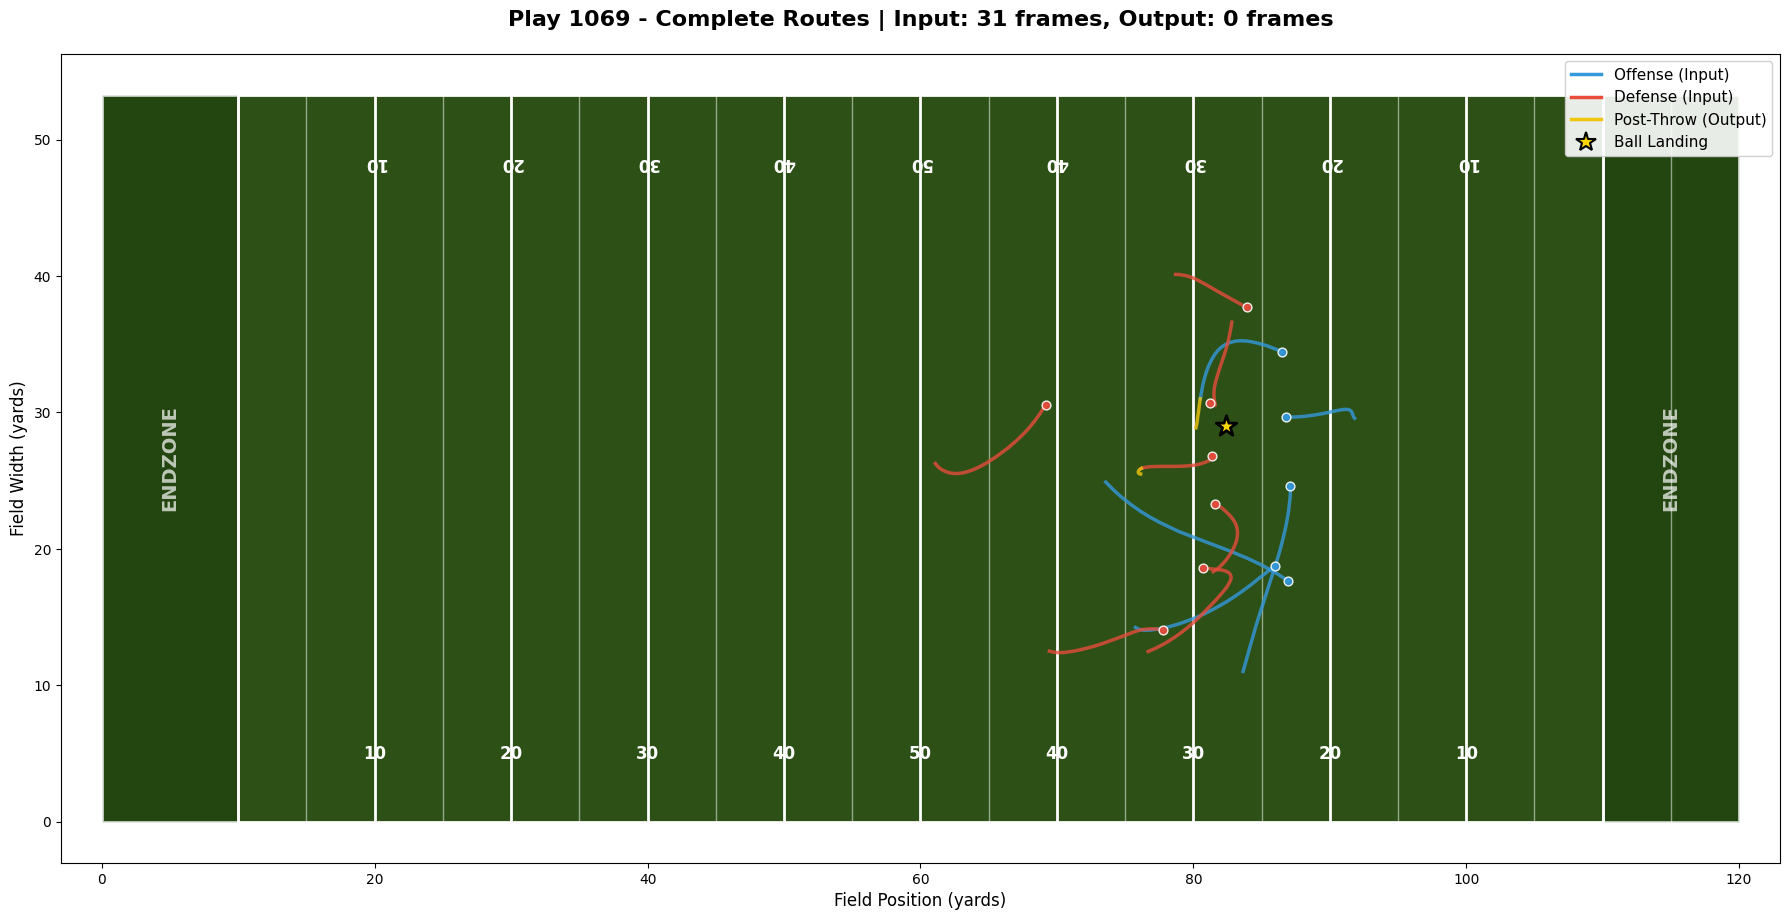

Play 1069: 12 players, 31 total frames


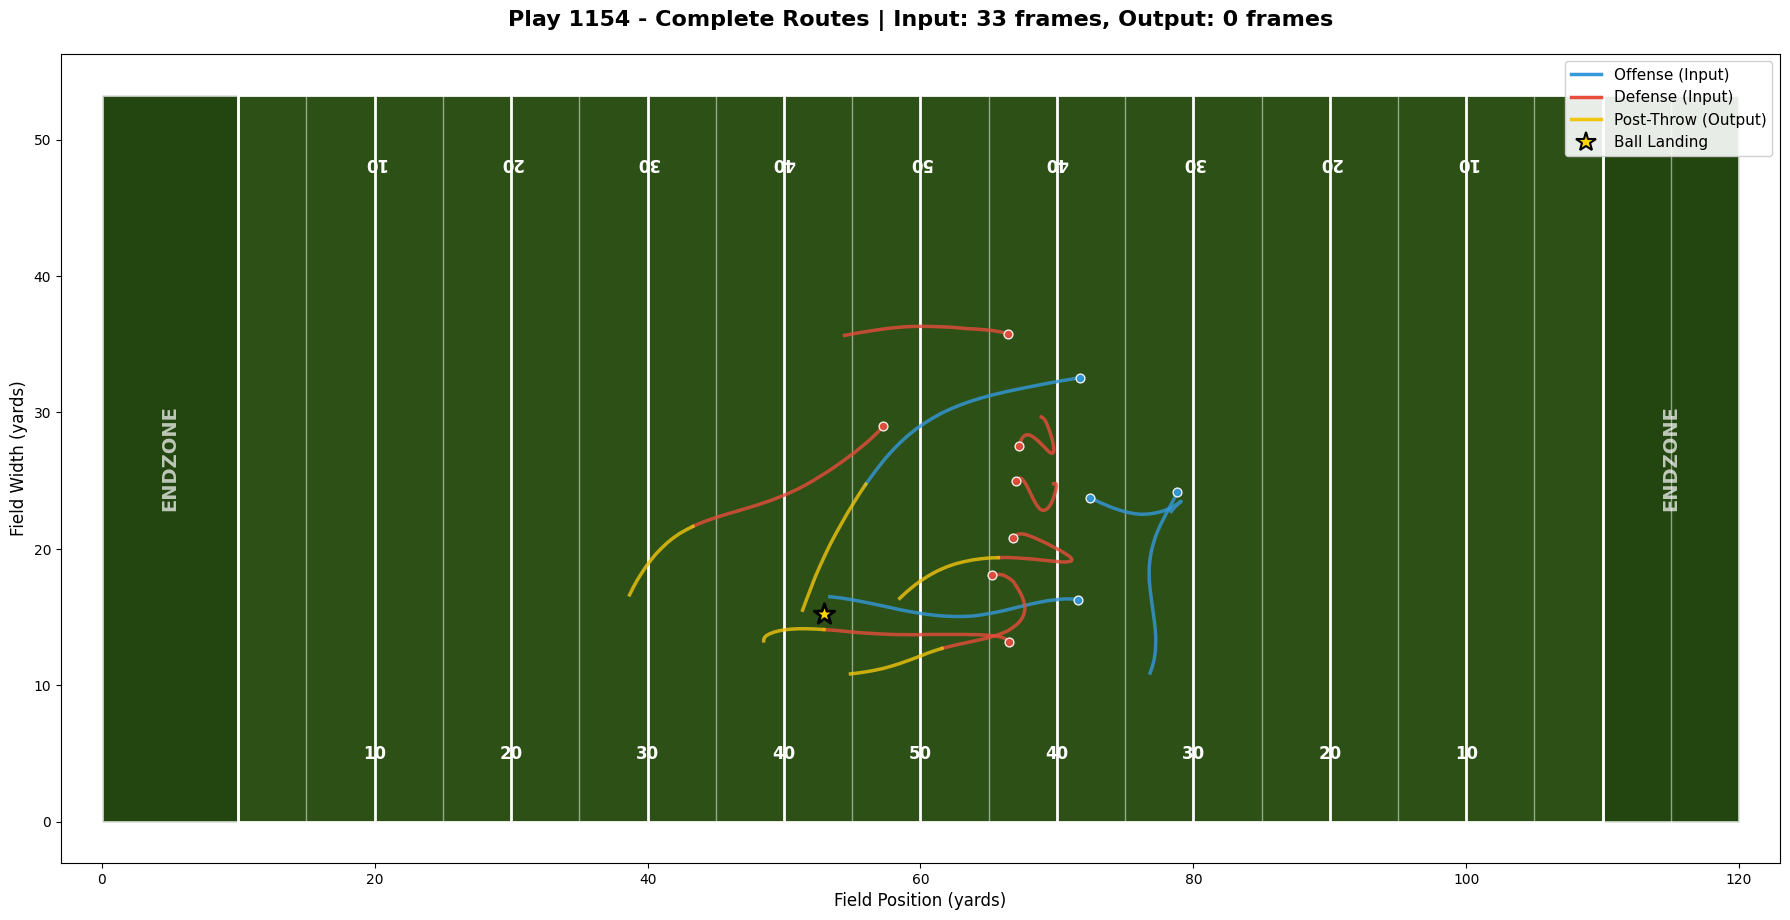

Play 1154: 11 players, 33 total frames


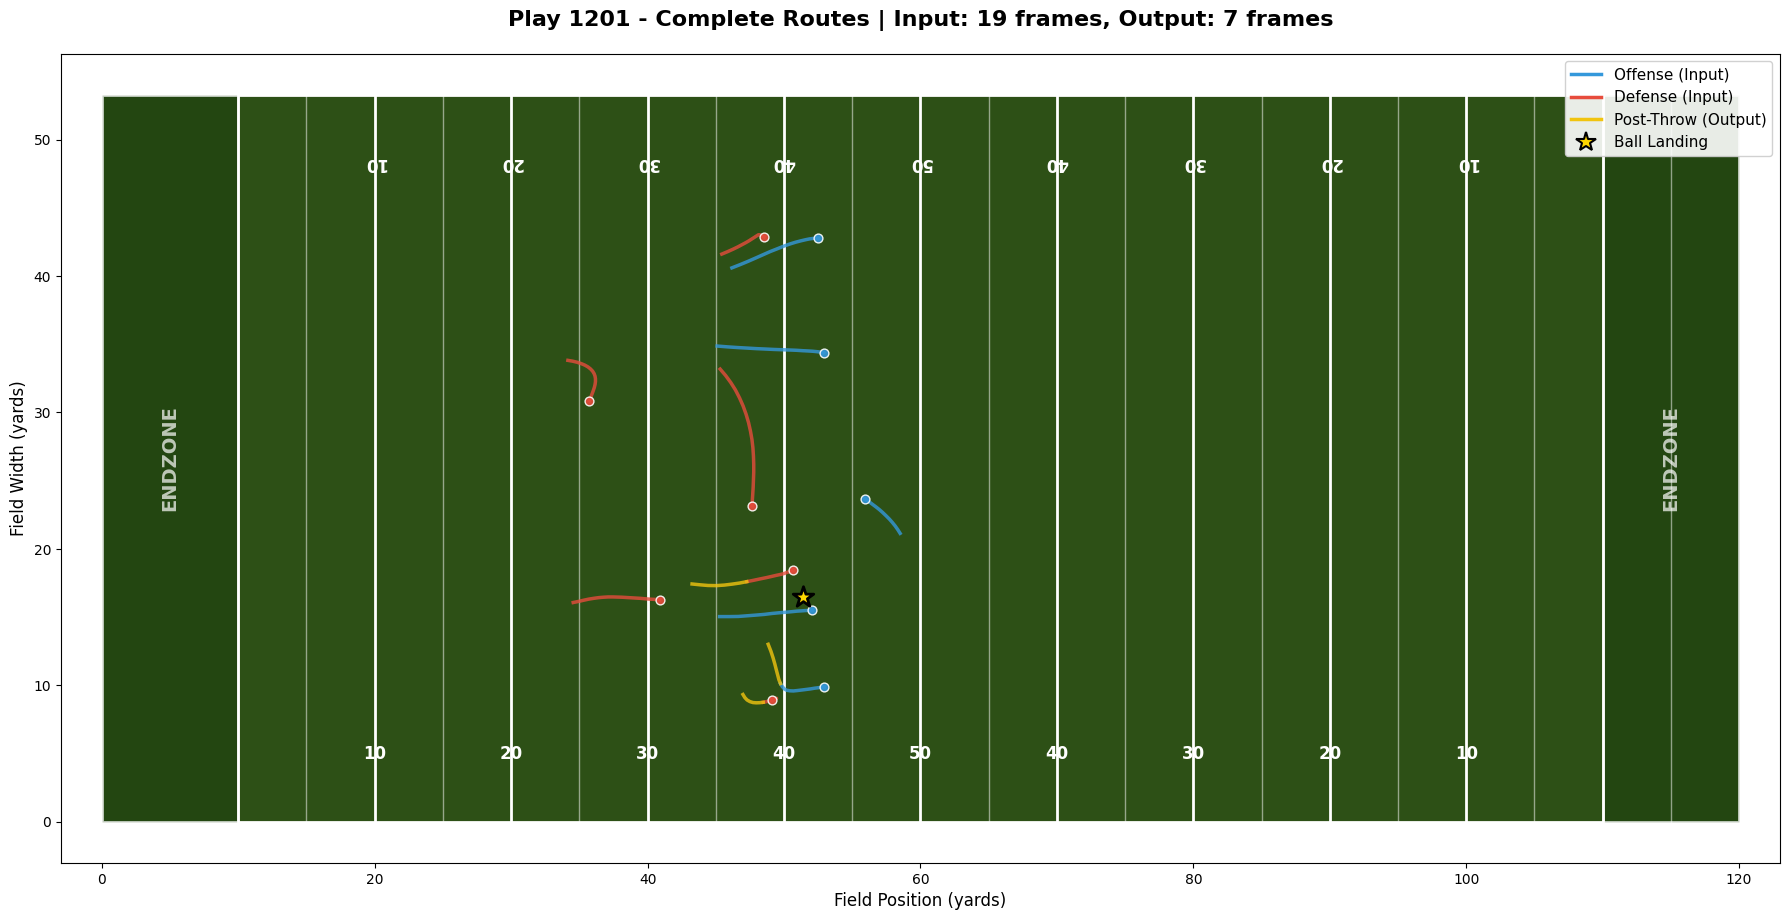

Play 1201: 11 players, 26 total frames


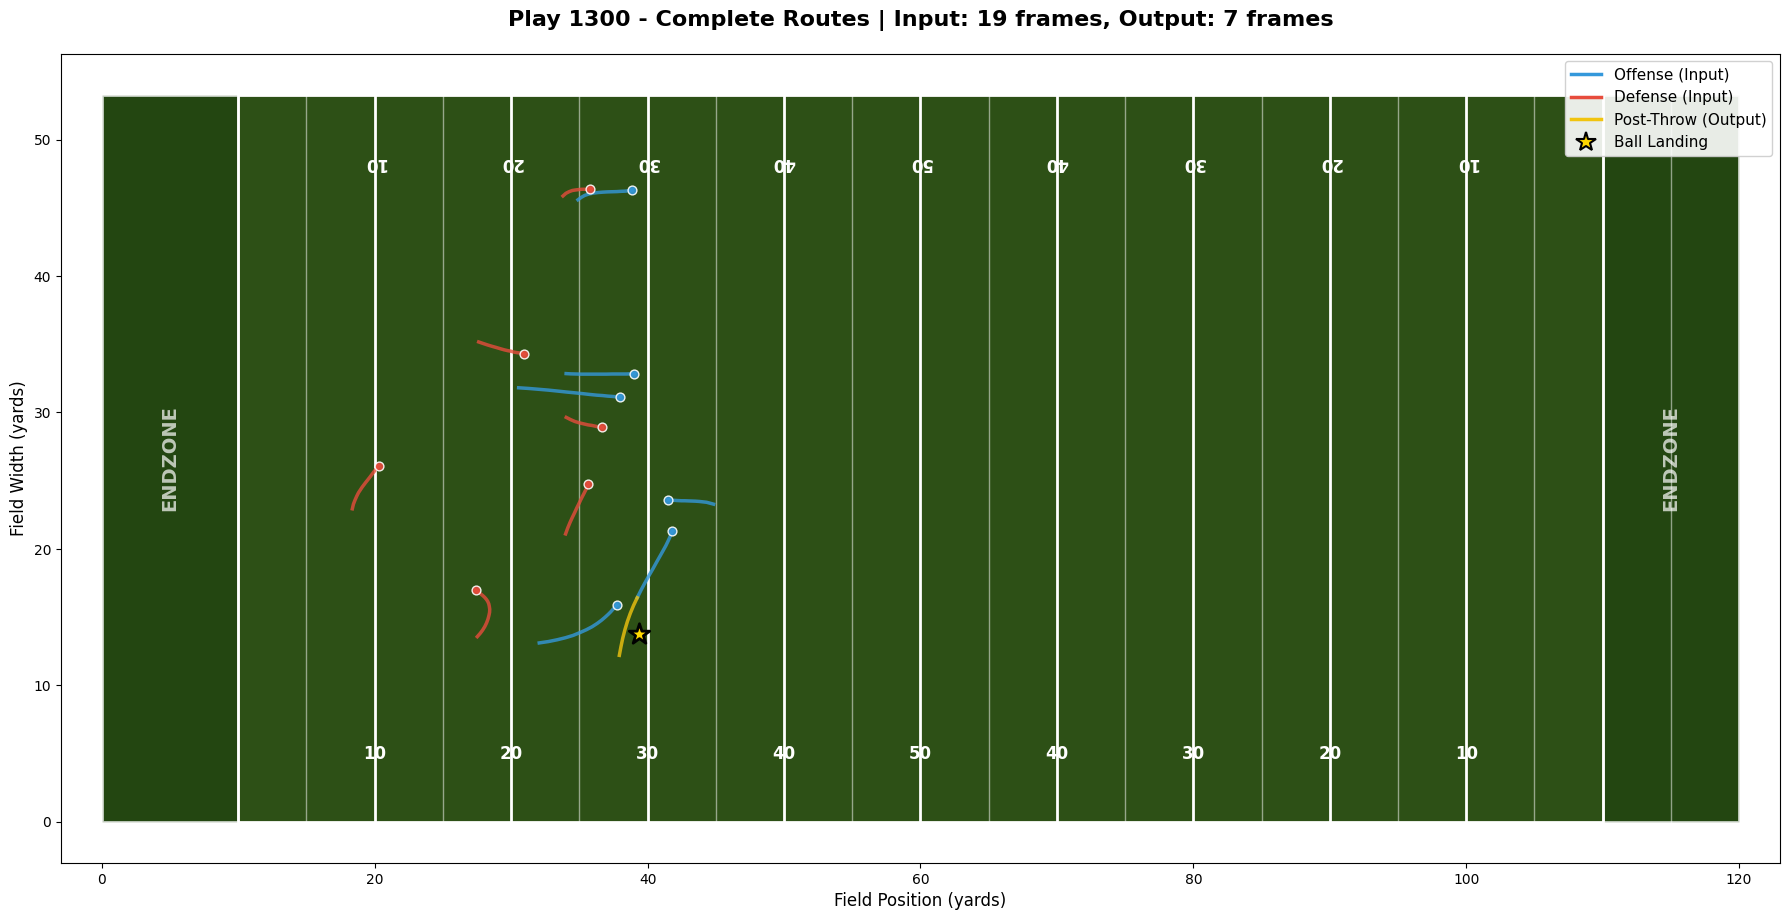

Play 1300: 12 players, 26 total frames


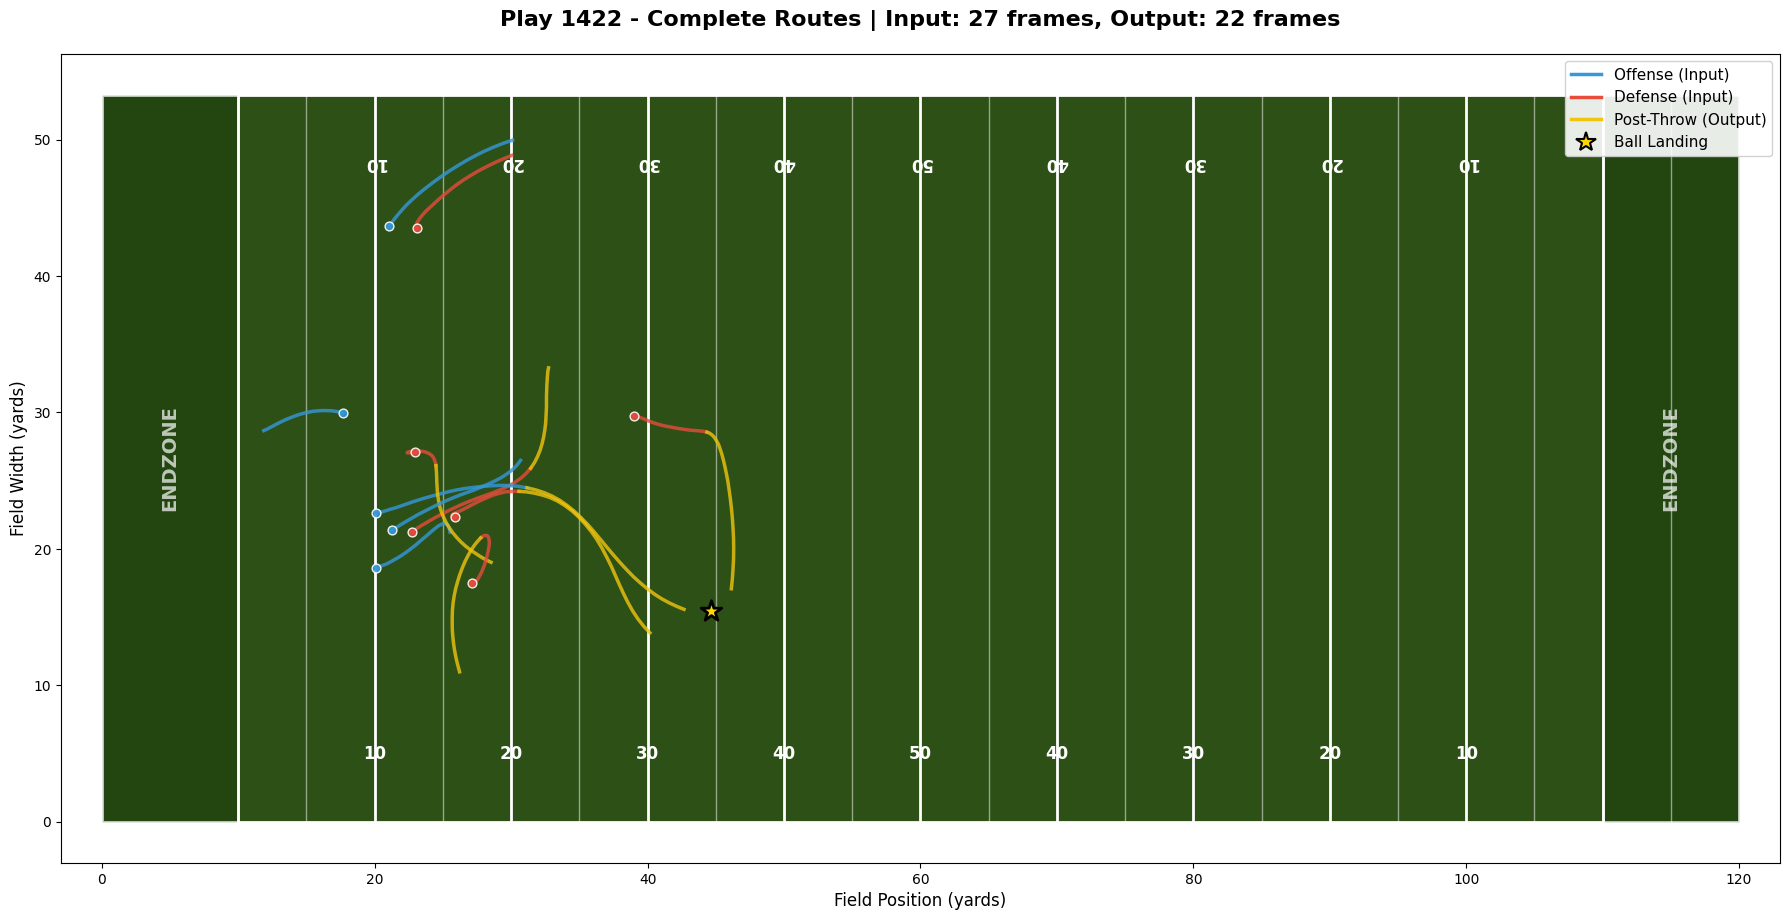

Play 1422: 11 players, 49 total frames


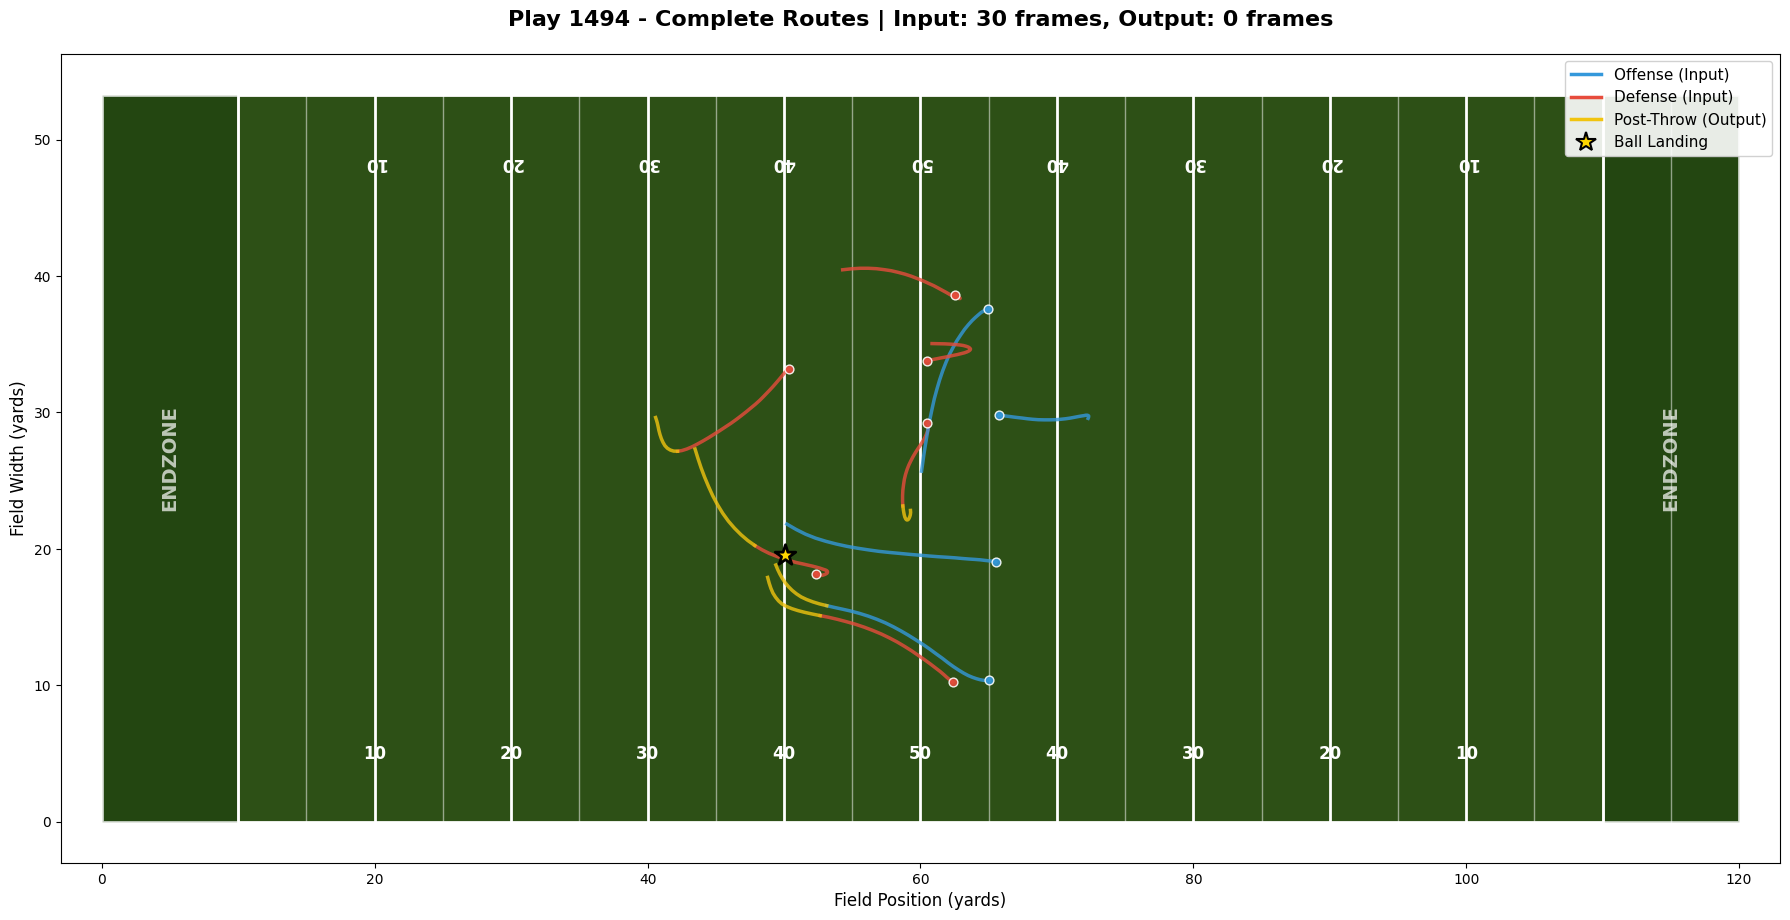

Play 1494: 10 players, 30 total frames


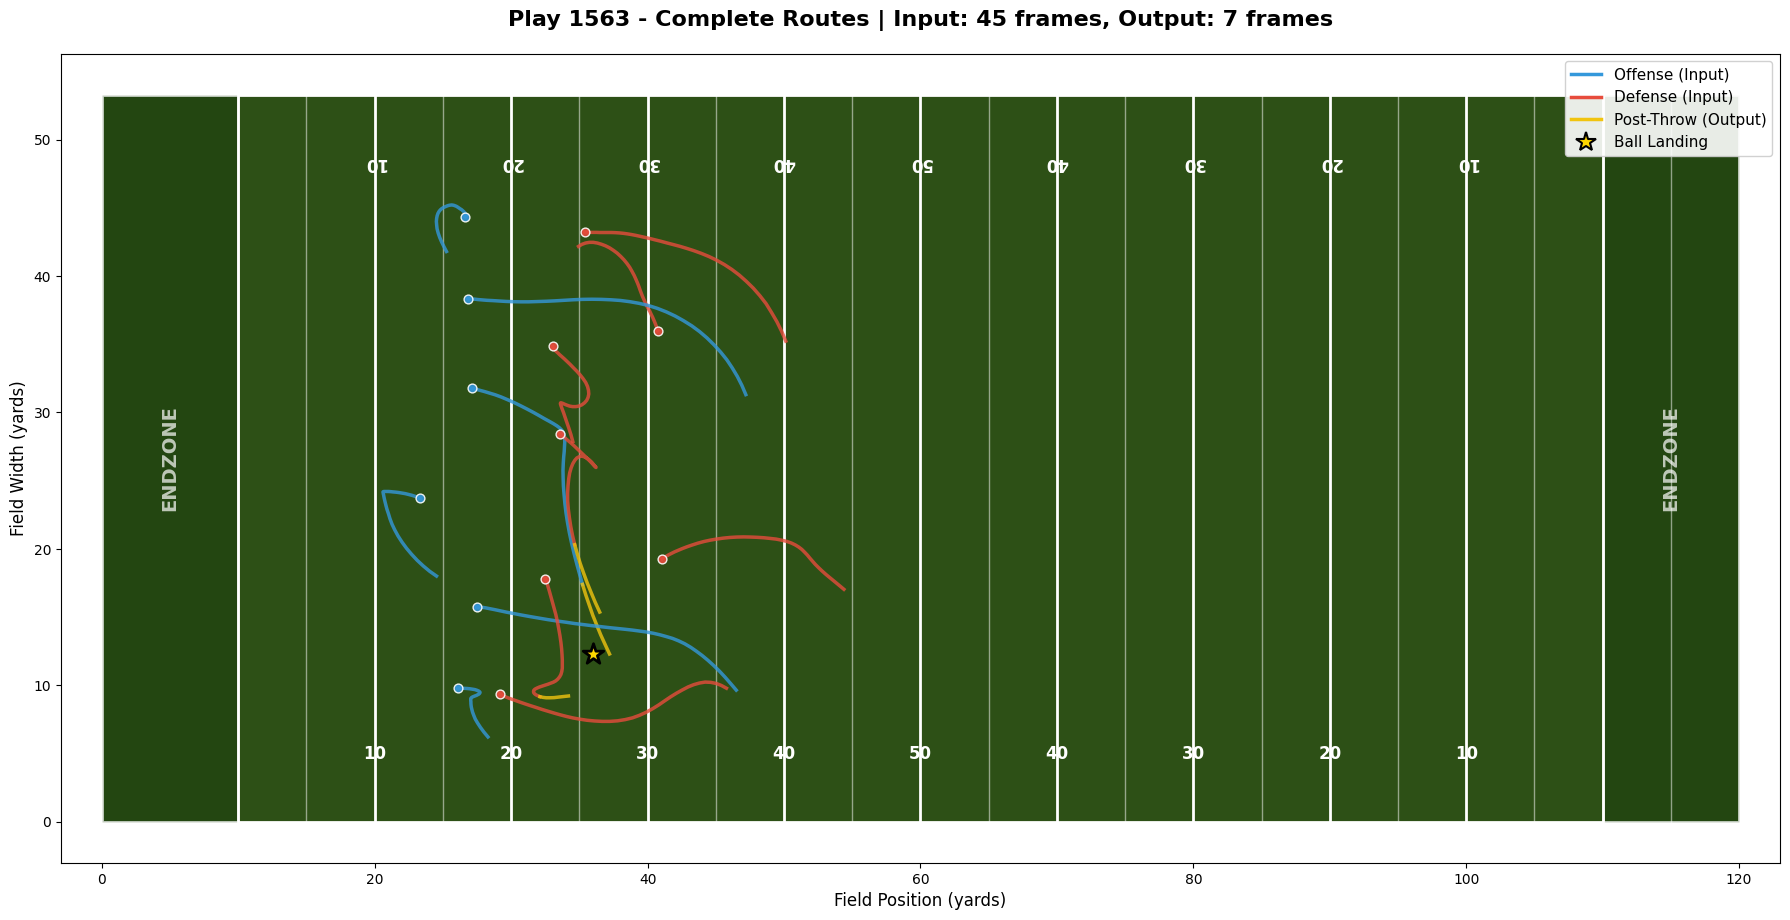

Play 1563: 13 players, 52 total frames


In [ ]:
# Visualize first 10 plays with COMPLETE routes (input + output)
play_ids = sorted(game_df['play_id'].unique())[10:20]

print(f"Visualizing {len(play_ids)} plays with complete routes...")

for play_id in play_ids:
    # Filter input data for this play
    input_play_df = game_df[game_df['play_id'] == play_id].sort_values(by='frame_id')
    
    # Filter output data for this play
    output_play_df = output_df[(output_df['game_id'] == game_id) & (output_df['play_id'] == play_id)]
    
    # Create Player objects with complete routes
    unique_players = input_play_df['nfl_id'].unique()
    complete_players = []
    
    for player_id in unique_players:
        player_input = input_play_df[input_play_df['nfl_id'] == player_id]
        player_output = output_play_df[output_play_df['nfl_id'] == player_id]
        complete_players.append(Player(player_input, player_output))
    
    # Create and draw the field
    field = FootballField(figsize=(18, 10))
    field.draw_field()
    
    # Add play info to title
    total_frames = complete_players[0].num_frames if complete_players else 0
    input_frames = complete_players[0].num_input_frames if complete_players else 0
    output_frames = complete_players[0].num_output_frames if complete_players else 0
    
    field.ax.set_title(
        f'Play {play_id} - Complete Routes | Input: {input_frames} frames, Output: {output_frames} frames', 
        fontsize=16, weight='bold', pad=20
    )
    
    # Plot complete routes
    field.plot_routes(complete_players, color_by_side=True, show_ball_landing=True)
    field.show()
    
    print(f"Play {play_id}: {len(complete_players)} players, {total_frames} total frames")
